In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("states.csv")

In [3]:
data.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN


In [4]:
data.drop(data[data['Date'] < "2020-04-25" ].index,inplace = True)

In [5]:
data.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
1356,2020-04-25,Andaman and Nicobar Islands,33,11,0,0,2679.0
1357,2020-04-25,Andhra Pradesh,1016,171,31,0,61266.0
1358,2020-04-25,Arunachal Pradesh,1,1,0,0,526.0
1359,2020-04-25,Assam,36,19,1,0,7159.0
1360,2020-04-25,Bihar,251,45,2,0,15885.0


In [6]:
data.drop(["Recovered","Deceased","Other"],axis=1,inplace=True)

In [7]:
data.head()

,Date,State,Confirmed,Tested
1356,2020-04-25,Andaman and Nicobar Islands,33,2679.0
1357,2020-04-25,Andhra Pradesh,1016,61266.0
1358,2020-04-25,Arunachal Pradesh,1,526.0
1359,2020-04-25,Assam,36,7159.0
1360,2020-04-25,Bihar,251,15885.0


In [8]:
data.shape

(13113, 4)

In [9]:
data=data.dropna()
data

,Date,State,Confirmed,Tested
1356,2020-04-25,Andaman and Nicobar Islands,33,2679.0
1357,2020-04-25,Andhra Pradesh,1016,61266.0
1358,2020-04-25,Arunachal Pradesh,1,526.0
1359,2020-04-25,Assam,36,7159.0
1360,2020-04-25,Bihar,251,15885.0
...,...,...,...,...
14464,2021-04-19,Tripura,34091,666583.0
14465,2021-04-19,India,15326274,269414035.0
14466,2021-04-19,Uttar Pradesh,879831,38467016.0
14467,2021-04-19,Uttarakhand,126193,3363489.0


In [10]:
data.drop(data[data['State']=="State Unassigned"].index,inplace=True)

In [11]:
data.shape

(13040, 4)

In [12]:
data.drop(data[data['Tested']=="0"].index,inplace=True)

In [13]:
data.shape

(13040, 4)

In [14]:
Probability=data["Confirmed"]/data["Tested"]
data["Probability"]=Probability

In [15]:
data.head()

,Date,State,Confirmed,Tested,Probability
1356,2020-04-25,Andaman and Nicobar Islands,33,2679.0,0.012318
1357,2020-04-25,Andhra Pradesh,1016,61266.0,0.016583
1358,2020-04-25,Arunachal Pradesh,1,526.0,0.001901
1359,2020-04-25,Assam,36,7159.0,0.005029
1360,2020-04-25,Bihar,251,15885.0,0.015801


In [16]:
data.drop(data[data['State']=="India"].index,inplace=True)

In [17]:
data.drop(data[data['State']=="Lakshadweep"].index,inplace=True)

In [18]:
data.drop(data[data['Date'] <= "2020-05-03" ].index,inplace = True)

In [19]:
data.shape

(12285, 5)

In [20]:
data.to_csv('new_states.csv',index=False)

In [21]:
data_final=pd.read_csv("new_states.csv",index_col=False)

In [22]:
data_final.head(40)
data_final.shape

(12285, 5)

In [23]:
gr = data_final.groupby('Date')

In [24]:
gr.head()


,Date,State,Confirmed,Tested,Probability
0,2020-05-04,Andaman and Nicobar Islands,33,3754.0,0.008791
1,2020-05-04,Andhra Pradesh,1650,125229.0,0.013176
2,2020-05-04,Arunachal Pradesh,1,869.0,0.001151
3,2020-05-04,Assam,43,12775.0,0.003366
4,2020-05-04,Bihar,528,28345.0,0.018628
...,...,...,...,...,...
12250,2021-04-19,Andaman and Nicobar Islands,5421,352086.0,0.015397
12251,2021-04-19,Andhra Pradesh,968000,15715757.0,0.061594
12252,2021-04-19,Arunachal Pradesh,17052,421131.0,0.040491
12253,2021-04-19,Assam,225822,7896270.0,0.028599


In [25]:
for name, group in gr:
    print(name)
    group = group.sort_values(by=['State'])
    print(group)
    print('\n')


2020-05-04
          Date                                     State  Confirmed    Tested  \
0   2020-05-04               Andaman and Nicobar Islands         33    3754.0   
1   2020-05-04                            Andhra Pradesh       1650  125229.0   
2   2020-05-04                         Arunachal Pradesh          1     869.0   
3   2020-05-04                                     Assam         43   12775.0   
4   2020-05-04                                     Bihar        528   28345.0   
5   2020-05-04                                Chandigarh        102    1678.0   
6   2020-05-04                              Chhattisgarh         58   19902.0   
8   2020-05-04  Dadra and Nagar Haveli and Daman and Diu          0    4434.0   
7   2020-05-04                                     Delhi       4898   64108.0   
9   2020-05-04                                       Goa          7    2899.0   
10  2020-05-04                                   Gujarat       5804   84648.0   
12  2020-05-04   

1994   478419.0     0.037430  


2020-06-30
            Date                                     State  Confirmed  \
1995  2020-06-30               Andaman and Nicobar Islands         97   
1996  2020-06-30                            Andhra Pradesh      14595   
1997  2020-06-30                         Arunachal Pradesh        191   
1998  2020-06-30                                     Assam       8408   
1999  2020-06-30                                     Bihar       9987   
2000  2020-06-30                                Chandigarh        440   
2001  2020-06-30                              Chhattisgarh       2858   
2003  2020-06-30  Dadra and Nagar Haveli and Daman and Diu        213   
2002  2020-06-30                                     Delhi      87360   
2004  2020-06-30                                       Goa       1315   
2005  2020-06-30                                   Gujarat      32643   
2007  2020-06-30                                   Haryana      14548   
2006  2

4304  2020784.0     0.084958  


2020-09-04
            Date                                     State  Confirmed  \
4305  2020-09-04               Andaman and Nicobar Islands       3257   
4306  2020-09-04                            Andhra Pradesh     476506   
4307  2020-09-04                         Arunachal Pradesh       4775   
4308  2020-09-04                                     Assam     121225   
4309  2020-09-04                                     Bihar     144134   
4310  2020-09-04                                Chandigarh       5268   
4311  2020-09-04                              Chhattisgarh      40634   
4313  2020-09-04  Dadra and Nagar Haveli and Daman and Diu       2510   
4312  2020-09-04                                     Delhi     185220   
4314  2020-09-04                                       Goa      19863   
4315  2020-09-04                                   Gujarat     101695   
4317  2020-09-04                                   Haryana      71983   
4316  2

2020-10-25
            Date                                     State  Confirmed  \
6090  2020-10-25               Andaman and Nicobar Islands       4245   
6091  2020-10-25                            Andhra Pradesh     807023   
6092  2020-10-25                         Arunachal Pradesh      14244   
6093  2020-10-25                                     Assam     204171   
6094  2020-10-25                                     Bihar     212192   
6095  2020-10-25                                Chandigarh      14038   
6096  2020-10-25                              Chhattisgarh     175959   
6098  2020-10-25  Dadra and Nagar Haveli and Daman and Diu       3226   
6097  2020-10-25                                     Delhi     356656   
6099  2020-10-25                                       Goa      42242   
6100  2020-10-25                                   Gujarat     167173   
6102  2020-10-25                                   Haryana     158304   
6101  2020-10-25                        

7699   6255888.0     0.081675  


2020-12-10
            Date                                     State  Confirmed  \
7700  2020-12-10               Andaman and Nicobar Islands       4791   
7701  2020-12-10                            Andhra Pradesh     873995   
7702  2020-12-10                         Arunachal Pradesh      16479   
7703  2020-12-10                                     Assam     214305   
7704  2020-12-10                                     Bihar     241534   
7705  2020-12-10                                Chandigarh      18410   
7706  2020-12-10                              Chhattisgarh     252638   
7708  2020-12-10  Dadra and Nagar Haveli and Daman and Diu       3348   
7707  2020-12-10                                     Delhi     601150   
7709  2020-12-10                                       Goa      49131   
7710  2020-12-10                                   Gujarat     224081   
7712  2020-12-10                                   Haryana     249329   
7711  



2021-02-03
            Date                                     State  Confirmed  \
9625  2021-02-03               Andaman and Nicobar Islands       4994   
9626  2021-02-03                            Andhra Pradesh     888099   
9627  2021-02-03                         Arunachal Pradesh      16829   
9628  2021-02-03                                     Assam     217175   
9629  2021-02-03                                     Bihar     261004   
9630  2021-02-03                                Chandigarh      21015   
9631  2021-02-03                              Chhattisgarh     306370   
9633  2021-02-03  Dadra and Nagar Haveli and Daman and Diu       3380   
9632  2021-02-03                                     Delhi     635481   
9634  2021-02-03                                       Goa      53638   
9635  2021-02-03                                   Gujarat     262406   
9637  2021-02-03                                   Haryana     268136   
9636  2021-02-03                      

             Date                                     State  Confirmed  \
11830  2021-04-07               Andaman and Nicobar Islands       5131   
11831  2021-04-07                            Andhra Pradesh     913274   
11832  2021-04-07                         Arunachal Pradesh      16861   
11833  2021-04-07                                     Assam     219027   
11834  2021-04-07                                     Bihar     271919   
11835  2021-04-07                                Chandigarh      29197   
11836  2021-04-07                              Chhattisgarh     396579   
11838  2021-04-07  Dadra and Nagar Haveli and Daman and Diu       3773   
11837  2021-04-07                                     Delhi     690568   
11839  2021-04-07                                       Goa      60229   
11840  2021-04-07                                   Gujarat     328453   
11842  2021-04-07                                   Haryana     304638   
11841  2021-04-07                     

In [26]:
lol = []
c = 0
for name, group in gr:
    group = group.sort_values(by=['State'])
    ls = list(group['Probability'])
    lol.append(ls)
    c = c + 1
    
print(c, lol)

351 [[0.008790623335109217, 0.013175861821143664, 0.0011507479861910242, 0.003365949119373777, 0.01862762391956253, 0.06078665077473184, 0.0029142799718621247, 0.0, 0.07640232108317213, 0.0024146257330113826, 0.06856629808146678, 0.013540057093470916, 0.005518169582772544, 0.025745593815383525, 0.008314054366685945, 0.00822042352228101, 0.014107954064501566, 0.015915119363395226, 0.056473749880026874, 0.08636131469229216, 0.003502626970227671, 0.006369426751592357, 0.00546448087431694, 0.0, 0.0041091227387667776, 0.0027430661383724478, 0.043159922928709064, 0.023681319531479682, 0.0, 0.02178315027305639, 0.056281771968046485, 0.0055617352614015575, 0.028138351983723296, 0.007686395080707149, 0.050127408823061], [0.008790623335109217, 0.012862193989152908, 0.0010309278350515462, 0.0033477161136735607, 0.018582195825084233, 0.0694687682428488, 0.002766965248792384, 0.00020916126333403052, 0.07522254318222013, 0.002260981912144703, 0.06967377722242056, 0.013371724171587529, 0.005321170657

In [27]:
data_final[data_final['Date'] == '2020-09-14'].sort_values(by=['State'])

,Date,State,Confirmed,Tested,Probability
4655,2020-09-14,Andaman and Nicobar Islands,3557,45987.0,0.077348
4656,2020-09-14,Andhra Pradesh,575079,4661355.0,0.123372
4657,2020-09-14,Arunachal Pradesh,6297,208164.0,0.030250
4658,2020-09-14,Assam,144166,2750037.0,0.052423
4659,2020-09-14,Bihar,159526,4986747.0,0.031990
4660,2020-09-14,Chandigarh,8245,51718.0,0.159422
4661,2020-09-14,Chhattisgarh,67327,806045.0,0.083528
4663,2020-09-14,Dadra and Nagar Haveli and Daman and Diu,2765,59154.0,0.046742
4662,2020-09-14,Delhi,221533,2184316.0,0.101420
4664,2020-09-14,Goa,24898,225910.0,0.110212


In [28]:
states_all = ['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

In [29]:
number_of_turns = 351

number_of_slot_machines = 35

number_of_positive_rewards = np.zeros(number_of_slot_machines)
number_of_negative_rewards = np.zeros(number_of_slot_machines)

np.random.seed(33)

conversion_rates = lol

In [30]:
np.random.seed(55)

outcomes = np.zeros((number_of_turns, number_of_slot_machines)) 
for turn_index in range(number_of_turns):
    for slot_machine_index in range(number_of_slot_machines): 
        
        if np.random.rand() <= conversion_rates[turn_index][slot_machine_index]:
            outcomes[turn_index][slot_machine_index] = 1


print(outcomes[0:15, 0:number_of_slot_machines])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [31]:
for i in range(number_of_slot_machines):
  print('Mean for {0}: {1:.2%}'.format(states_all[i], np.mean(outcomes[:, i])))

Mean for Andaman and Nicobar Islands: 3.70%
Mean for Andhra Pradesh: 6.27%
Mean for Arunachal Pradesh: 3.42%
Mean for Assam: 4.27%
Mean for Bihar: 3.99%
Mean for Chandigarh: 9.69%
Mean for Chhattisgarh: 5.41%
Mean for Dadra and Nagar Haveli and Daman and Diu: 3.13%
Mean for Delhi: 6.27%
Mean for Goa: 7.98%
Mean for Gujarat: 3.70%
Mean for Haryana: 6.27%
Mean for Himachal Pradesh: 5.98%
Mean for Jammu and Kashmir: 3.42%
Mean for Jharkhand: 2.56%
Mean for Karnataka: 7.41%
Mean for Kerala: 8.26%
Mean for Ladakh: 8.55%
Mean for Madhya Pradesh: 2.85%
Mean for Maharashtra: 16.81%
Mean for Manipur: 4.56%
Mean for Meghalaya: 1.99%
Mean for Mizoram: 2.85%
Mean for Nagaland: 7.12%
Mean for Odisha: 5.70%
Mean for Puducherry: 7.98%
Mean for Punjab: 3.70%
Mean for Rajasthan: 4.27%
Mean for Sikkim: 3.42%
Mean for Tamil Nadu: 8.26%
Mean for Telangana: 7.98%
Mean for Tripura: 4.56%
Mean for Uttar Pradesh: 2.85%
Mean for Uttarakhand: 4.56%
Mean for West Bengal: 5.70%


In [32]:
for _ in range(5):
    for turn_index in range(number_of_turns):
        index_of_machine_to_play = -1
        max_beta = -1

        for slot_machine_index in range(number_of_slot_machines):

            a = number_of_positive_rewards[slot_machine_index] + 1
            b = number_of_negative_rewards[slot_machine_index] + 1

            random_beta = np.random.beta(a, b)

            if random_beta > max_beta:
                max_beta = random_beta 
                index_of_machine_to_play = slot_machine_index 

        if outcomes[turn_index][index_of_machine_to_play] == 1:
            number_of_positive_rewards[index_of_machine_to_play] += 1
        else:
            number_of_negative_rewards[index_of_machine_to_play] += 1

number_of_times_played = number_of_positive_rewards + number_of_negative_rewards 
for slot_machine_index in range(number_of_slot_machines): 
    print('{0} was chosen {1} times'.format(states_all[slot_machine_index], number_of_times_played[slot_machine_index]))

print('\nThe most frequently chosen state is {}'.format(states_all[np.argmax(number_of_times_played)]))

Andaman and Nicobar Islands was chosen 23.0 times
Andhra Pradesh was chosen 119.0 times
Arunachal Pradesh was chosen 42.0 times
Assam was chosen 32.0 times
Bihar was chosen 21.0 times
Chandigarh was chosen 47.0 times
Chhattisgarh was chosen 80.0 times
Dadra and Nagar Haveli and Daman and Diu was chosen 53.0 times
Delhi was chosen 30.0 times
Goa was chosen 35.0 times
Gujarat was chosen 34.0 times
Haryana was chosen 38.0 times
Himachal Pradesh was chosen 47.0 times
Jammu and Kashmir was chosen 58.0 times
Jharkhand was chosen 24.0 times
Karnataka was chosen 55.0 times
Kerala was chosen 50.0 times
Ladakh was chosen 24.0 times
Madhya Pradesh was chosen 38.0 times
Maharashtra was chosen 210.0 times
Manipur was chosen 34.0 times
Meghalaya was chosen 33.0 times
Mizoram was chosen 29.0 times
Nagaland was chosen 66.0 times
Odisha was chosen 24.0 times
Puducherry was chosen 60.0 times
Punjab was chosen 22.0 times
Rajasthan was chosen 46.0 times
Sikkim was chosen 22.0 times
Tamil Nadu was chosen 6

In [33]:
positive_rewards = np.ndarray.tolist(number_of_positive_rewards)
negative_rewards = np.ndarray.tolist(number_of_negative_rewards)

for i in range(35):
    if positive_rewards[i] == 0.0:
        positive_rewards[i] = 0.0001
        
    if negative_rewards[i] == 0.0:
        negative_rewards[i] = 0.0001
        
print("a = ", positive_rewards, "\n")
print("b = ", negative_rewards)

a =  [0.0001, 15.0, 2.0, 2.0, 0.0001, 3.0, 9.0, 4.0, 1.0, 1.0, 1.0, 3.0, 3.0, 4.0, 0.0001, 4.0, 4.0, 0.0001, 2.0, 31.0, 1.0, 1.0, 0.0001, 7.0, 0.0001, 6.0, 0.0001, 3.0, 0.0001, 6.0, 3.0, 9.0, 1.0, 3.0, 8.0] 

b =  [23.0, 104.0, 40.0, 30.0, 21.0, 44.0, 71.0, 49.0, 29.0, 34.0, 33.0, 35.0, 44.0, 54.0, 24.0, 51.0, 46.0, 24.0, 36.0, 179.0, 33.0, 32.0, 29.0, 59.0, 24.0, 54.0, 22.0, 43.0, 22.0, 60.0, 47.0, 76.0, 32.0, 46.0, 68.0]


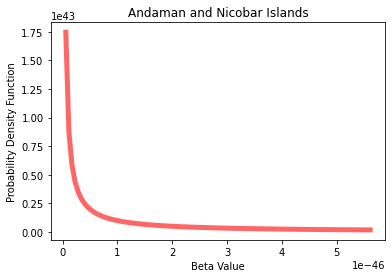

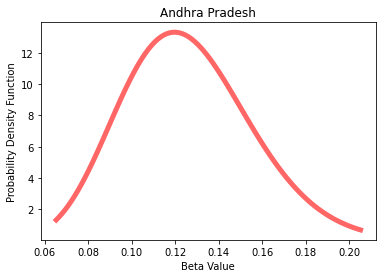

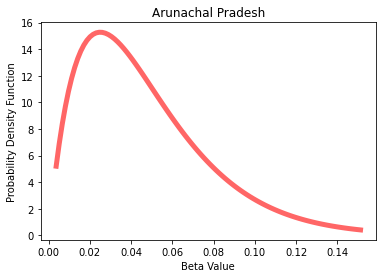

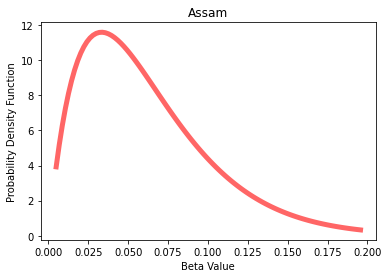

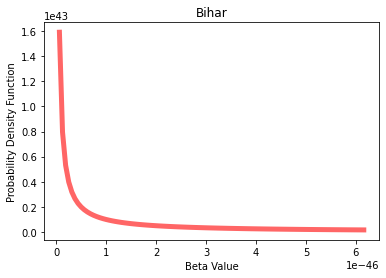

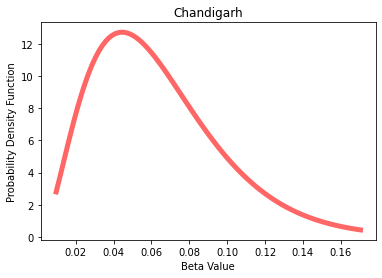

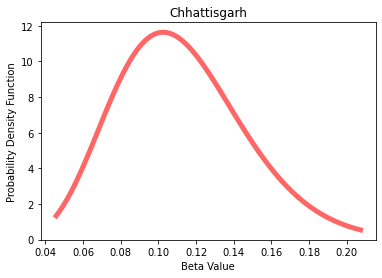

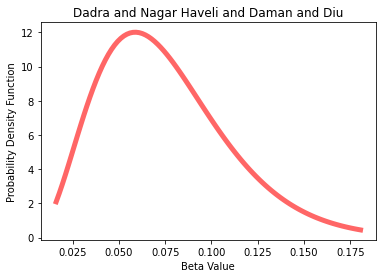

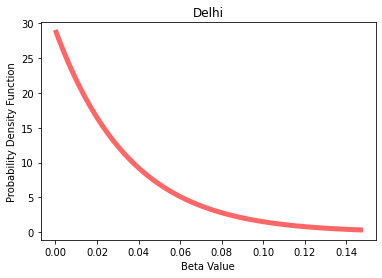

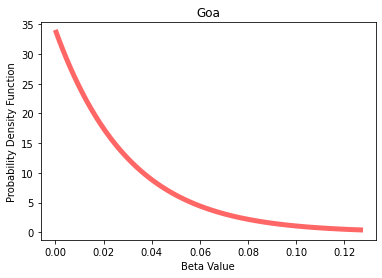

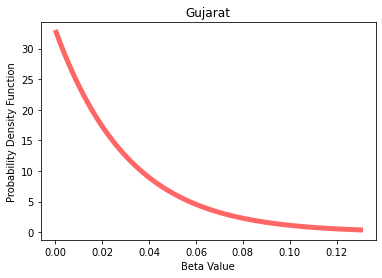

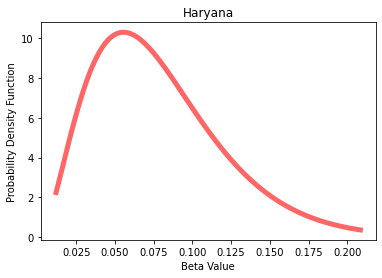

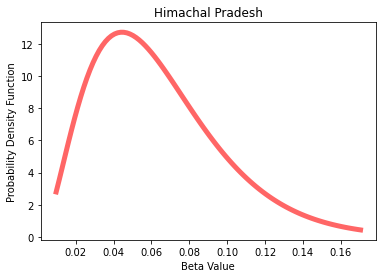

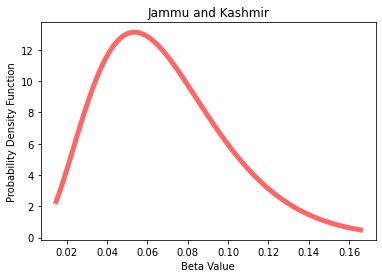

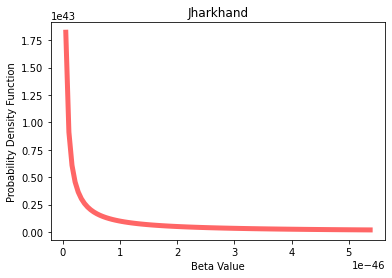

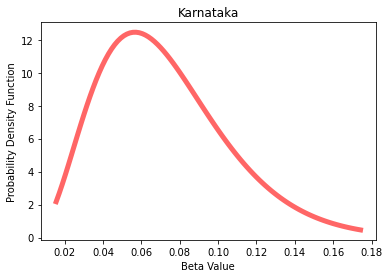

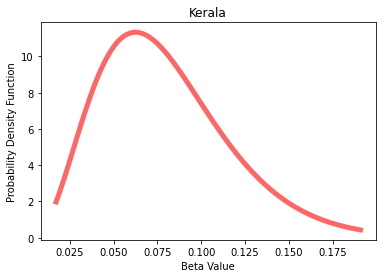

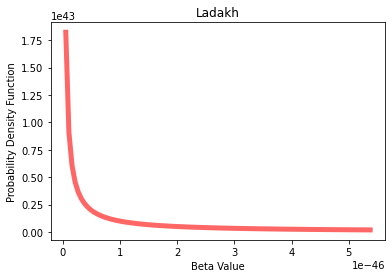

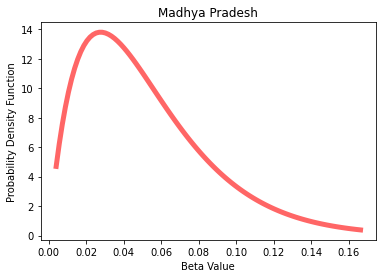

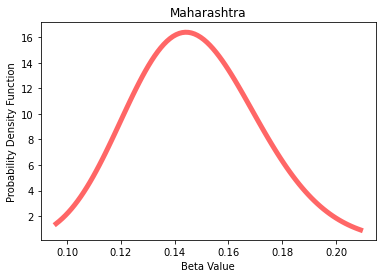

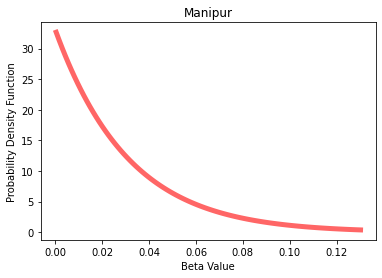

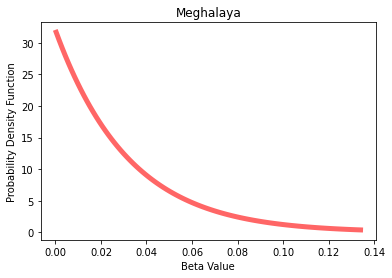

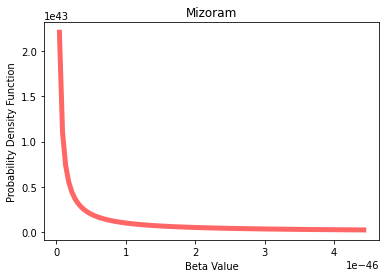

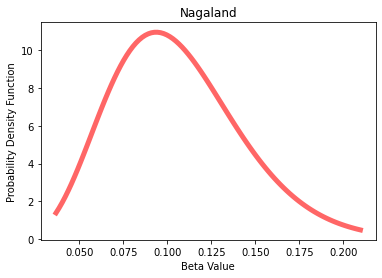

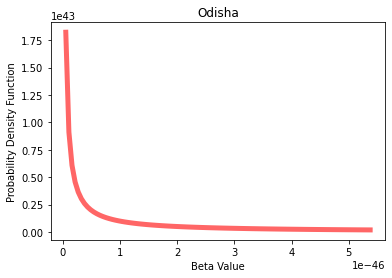

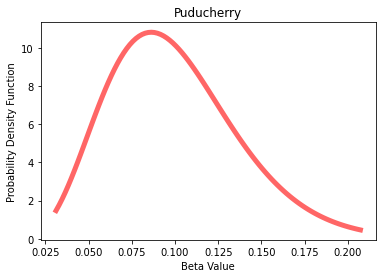

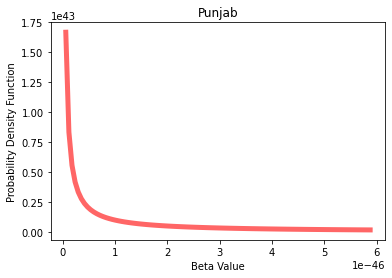

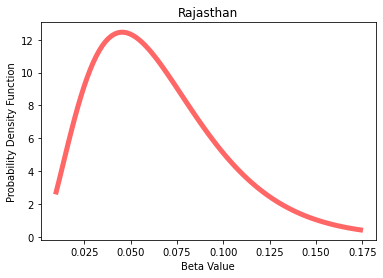

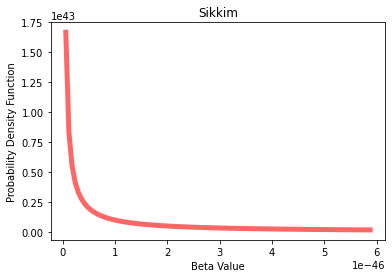

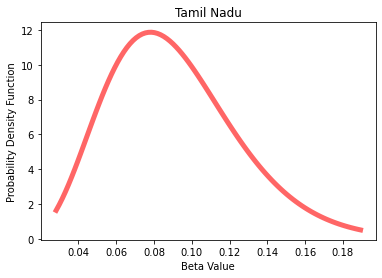

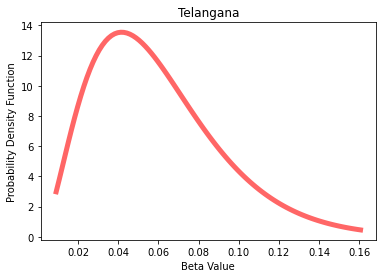

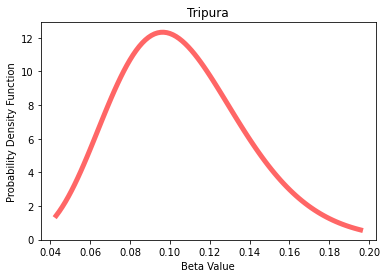

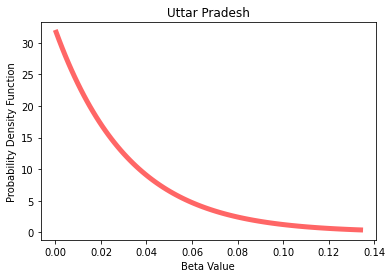

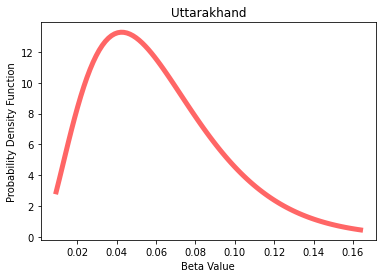

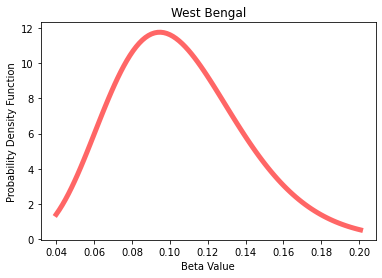

In [60]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

for i in range(35):

    a = positive_rewards[i]
    b = negative_rewards[i]

    fig, ax = plt.subplots(1, 1)

    mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

    x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)

    ax.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='beta pdf')

    plt.title(states_all[i])
    plt.xlabel("Beta Value")
    plt.ylabel("Probability Density Function")
    plt.show()
